### 导入所需的包

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 导入数据

In [2]:
filepath="E:\\homework\\NumericalPython\\WorldIndex.csv"
data=pd.read_csv(filepath)
data.head()

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528.0
1,Angola,Africa,52.666098,3695.793748,27859305.0
2,Benin,Africa,59.720707,783.947091,10575952.0
3,Botswana,Africa,64.487415,6532.060501,2209197.0
4,Burundi,Africa,57.107049,303.681022,10199270.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 5 columns):
Country            177 non-null object
Continent          177 non-null object
Life_expectancy    169 non-null float64
GDP_per_capita     169 non-null float64
Population         176 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


以上数据显示有存在缺失数据行，需要删除缺失数据



删除数据里包含缺失值的行

In [4]:
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 175
Data columns (total 5 columns):
Country            164 non-null object
Continent          164 non-null object
Life_expectancy    164 non-null float64
GDP_per_capita     164 non-null float64
Population         164 non-null float64
dtypes: float64(3), object(2)
memory usage: 7.7+ KB


缺失数据删除之后显示行数相同



重新定义列名

In [5]:
df.columns = ['country', 'continent', 'life', 'gdp', 'popu']

### 直方图

人均寿命数据的直方图

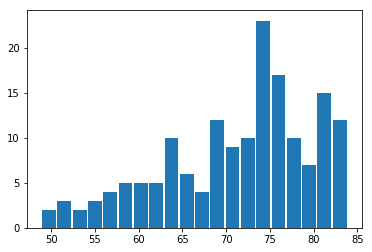

In [6]:
plt.hist(df.life, bins=20, rwidth=0.9)  # bins 设置区间数，rwidth设置柱子相对宽度
plt.show()

人均GDP直方图

查看数据类型

In [7]:
df.dtypes

country       object
continent     object
life         float64
gdp          float64
popu         float64
dtype: object

绘制人均GDP直方图

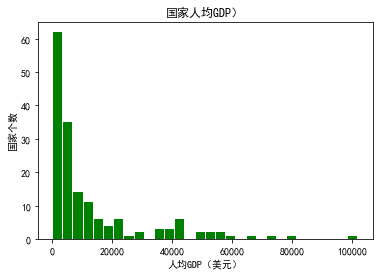

In [8]:
plt.rcParams['font.sans-serif']=['SimHei'] #正常显示中文标签 
df.loc[:'gdp']<= 20000
plt.hist(df.gdp,bins=30,rwidth=0.9,color='green')

plt.xlabel('人均GDP（美元）')
plt.ylabel('国家个数')
plt.title('国家人均GDP）')
plt.show()

### 箱线图

人均寿命箱线图

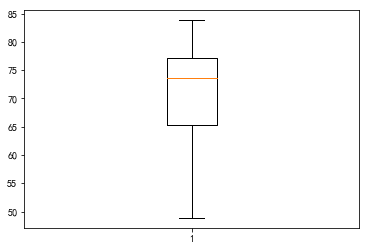

In [9]:
plt.boxplot(df.life)
plt.show()

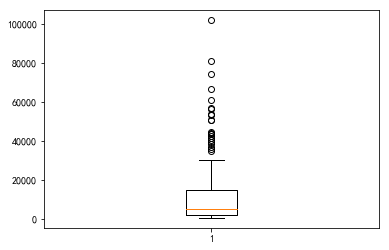

In [10]:
plt.boxplot(df.gdp)
plt.show()

### 条形图

统计每个大洲的国家个数

In [11]:
conti_count = df.continent.value_counts()
conti_count

Africa           48
Europe           41
Asia             36
North America    19
South America    11
Oceania           9
Name: continent, dtype: int64

获取各个大洲名称

In [12]:
conti = list(conti_count.index)
conti

['Africa', 'Europe', 'Asia', 'North America', 'South America', 'Oceania']

In [13]:
x = np.arange(len(conti))
x

array([0, 1, 2, 3, 4, 5])

绘制每个大洲的国家个数条形图

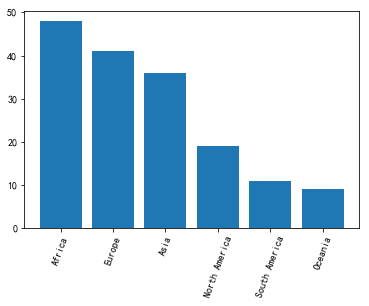

In [14]:
plt.bar(x, conti_count)
# 设置横坐标
plt.xticks(x, conti, rotation=70)   # rotation 旋转横坐标标签
plt.show()

### 饼图

绘制各大洲国家数量占比的饼图

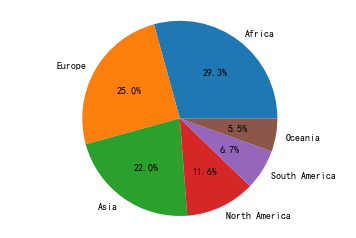

In [15]:
plt.pie(conti_count, labels=conti, autopct='%1.1f%%')  # autopct 显示占比
plt.axis('equal')  # 调整坐标轴的比例
plt.show()

### 散点图

绘制人均寿命和人均GDP的关系

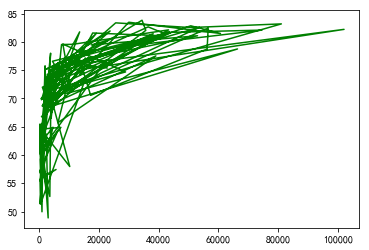

In [16]:
plt.plot(df.gdp, df.life,'g')
plt.show()

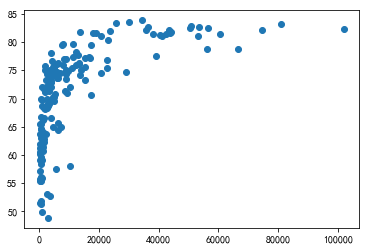

In [17]:
plt.scatter(df.gdp, df.life)
plt.show()

### 气泡图

人均GDP与人均寿命的气泡图
（数据点大小，正比于人口数，给不同洲的国家设置不同的颜色）

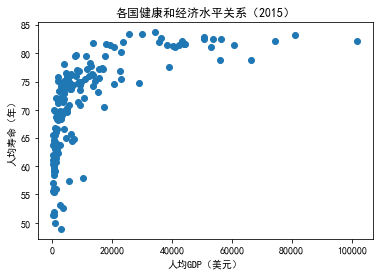

In [18]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 
plt.scatter(df.gdp, df.life)

plt.xlabel('人均GDP（美元）')  # x轴名称
plt.ylabel('人均寿命（年）')   # y轴名称
plt.title('各国健康和经济水平关系（2015）')  # 图标题
plt.show()

将横轴进行对数变换

设置轴刻度的显示

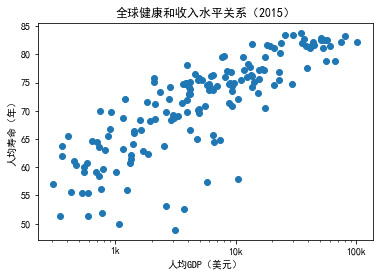

In [19]:
plt.scatter(df.gdp, df.life)
plt.xscale('log')

plt.xlabel('人均GDP（美元）')
plt.ylabel('人均寿命（年）')
plt.title('全球健康和收入水平关系（2015）')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)  # 重置x坐标刻度
plt.show()

设置各个数据点的大小，与人口数成正比

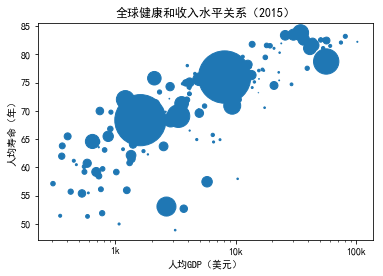

In [20]:
size = df.popu / 1e6 * 2  # 数据点大小，正比于人口数
plt.scatter(x=df.gdp, y=df.life, s=size)  # 参数s设置点的大小
plt.xscale('log')

plt.xlabel('人均GDP（美元）')
plt.ylabel('人均寿命（年）')
plt.title('全球健康和收入水平关系（2015）')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.show()

给不同洲的国家设置不同的颜色

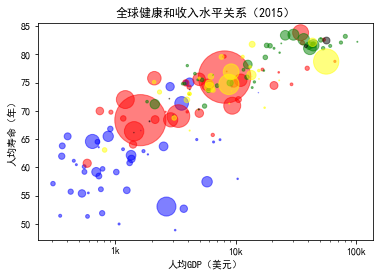

In [21]:
map_dict = {      
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'North America':'yellow',
    'South America':'yellow',
    'Oceania':'black'
}
colors = df.continent.map(map_dict)   # 将国家按所在州对于不同的颜色

size = df.popu / 1e6 * 2
plt.scatter(x=df.gdp, y=df.life, s=size, c=colors, alpha=0.5)  # 参数c设置颜色，alpha设置透明度
plt.xscale('log')

plt.xlabel('人均GDP（美元）')
plt.ylabel('人均寿命（年）')
plt.title('全球健康和收入水平关系（2015）')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)
plt.show()


在图形中进行添加文本

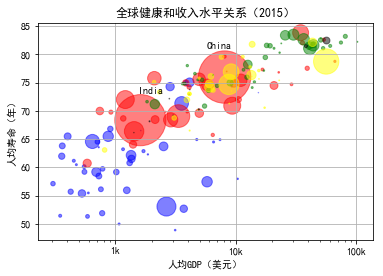

In [22]:
map = {
    'Asia':'red',
    'Europe':'green',
    'Africa':'blue',
    'North America':'yellow',
    'South America':'yellow',
    'Oceania':'black'
}
colors = df.continent.map(map_dict)

size = df.popu / 1e6 * 2
plt.scatter(x=df.gdp, y=df.life, s=size, c=colors, alpha=0.5)
plt.xscale('log')

plt.xlabel('人均GDP（美元）')
plt.ylabel('人均寿命（年）')
plt.title('全球健康和收入水平关系（2015）')

tick_val = [1000,10000,100000]
tick_lab = ['1k','10k','100k']
plt.xticks(tick_val, tick_lab)

plt.text(1550, 73, 'India')   # 在图中添加文本
plt.text(5700, 81, 'China')

plt.grid(True) 
plt.show()
